In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lstm = pd.read_csv('lstm.csv')
xgboost = pd.read_csv('xgboost.csv')
lstm, xgboost

(     YEAR  MONTH         CIVIL            IND
 0    2021      1  1.910935e+06  788090.209911
 1    2021      2  1.607537e+06  693185.417185
 2    2021      3  1.290014e+06  671754.466588
 3    2021      4  8.713010e+05  622213.516248
 4    2021      5  4.969926e+05  566520.397959
 ..    ...    ...           ...            ...
 163  2034      8  3.641802e+05  612875.796125
 164  2034      9  6.061673e+05  562139.022896
 165  2034     10  1.198691e+06  548955.963427
 166  2034     11  1.906855e+06  549739.171169
 167  2034     12  1.929708e+06  541989.043248
 
 [168 rows x 4 columns],
      YEAR  MONTH         CIVIL           IND
 0    2021      1  1.833041e+06  666025.87500
 1    2021      2  1.642872e+06  618176.87500
 2    2021      3  1.233616e+06  592492.12500
 3    2021      4  9.313196e+05  526261.75000
 4    2021      5  5.105114e+05  450868.71875
 ..    ...    ...           ...           ...
 175  2035      8  4.952187e+05  582991.00000
 176  2035      9  4.952197e+05  580808.2

In [3]:
final = pd.DataFrame()
final['YEAR'] = lstm['YEAR']
final['MONTH'] = lstm['MONTH']
final

,YEAR,MONTH
0,2021,1
1,2021,2
2,2021,3
3,2021,4
4,2021,5
...,...,...
163,2034,8
164,2034,9
165,2034,10
166,2034,11


In [4]:
final['CIVIL'] = lstm['CIVIL']*0.8 + xgboost['CIVIL']*0.2
final['IND'] = lstm['IND']*0.8 + xgboost['IND']*0.2
final

,YEAR,MONTH,CIVIL,IND
0,2021,1,1.895356e+06,763677.342929
1,2021,2,1.614604e+06,678183.708748
2,2021,3,1.278734e+06,655901.998270
3,2021,4,8.833047e+05,603023.162998
4,2021,5,4.996964e+05,543390.062117
...,...,...,...,...
163,2034,8,3.903879e+05,599173.499400
164,2034,9,5.839778e+05,566309.418317
165,2034,10,1.146304e+06,553786.145742
166,2034,11,1.732386e+06,581075.236935


In [5]:
final.to_csv("ensemble.csv", mode='w', index=False)

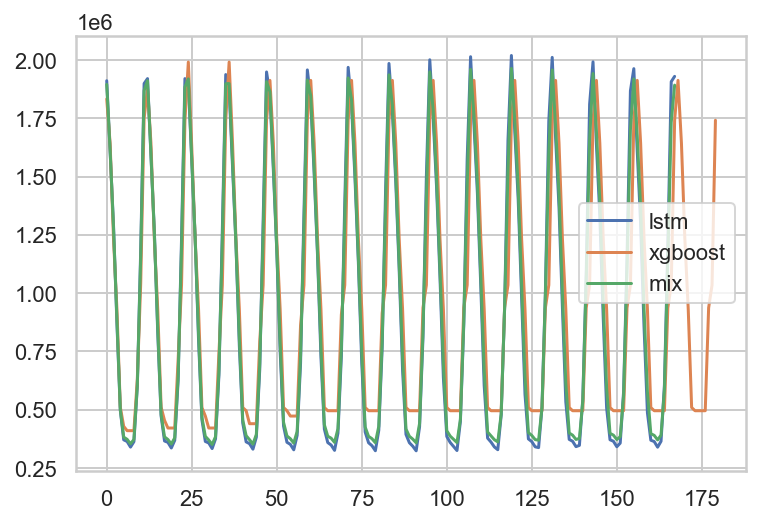

In [6]:
lstm['CIVIL'].plot()
xgboost['CIVIL'].plot()
final['CIVIL'].plot()
plt.legend(['lstm','xgboost','mix'])

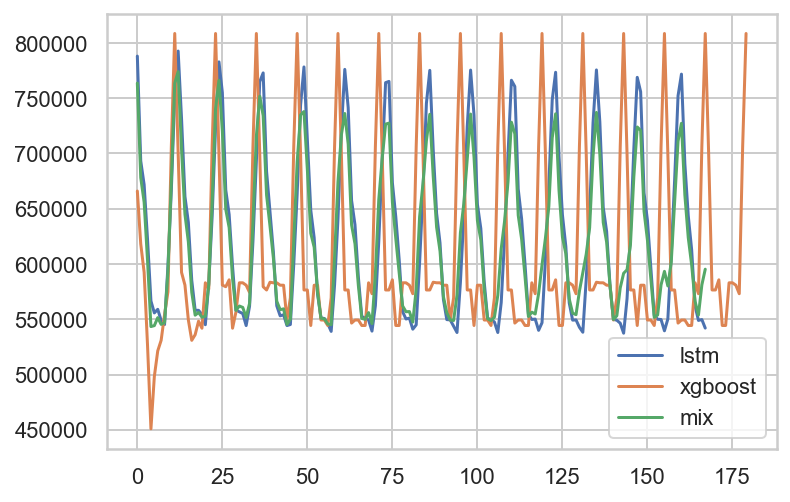

In [7]:
lstm['IND'].plot()
xgboost['IND'].plot()
final['IND'].plot()
plt.legend(['lstm','xgboost','mix'])

217826.67359점 -> lstm(단독 38만) *0.7 + xgboost *0.3

    model = Sequential()
    model.add(LSTM(300, input_shape=(12,1), return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(300, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    early_stop = EarlyStopping(monitor='loss', patience=30, verbose=1)
    h = model.fit(X_train_t, Y_train, epochs=300, validation_data=[X_test_t, Y_test],
         batch_size=10, verbose=1, callbacks=[early_stop])

226266.41284점 -> lstm(단독 33만) *0.8 + xgboost(처음) *0.2

    model = Sequential()
    model.add(LSTM(300, input_shape=(12,1), return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(300, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=1)
    h = model.fit(X_train_t, Y_train, epochs=300, validation_data=[X_test_t, Y_test],
         batch_size=10, verbose=1, callbacks=[early_stop])

Compile loss를 mean_absolute_error로 해보기

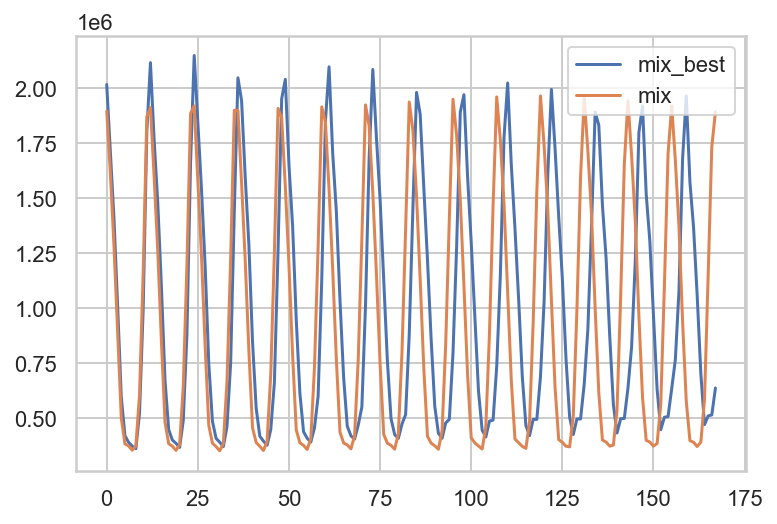

In [8]:
mix_best = pd.read_csv('mix_best.csv')
mix_best['CIVIL'].plot()
# lstm['CIVIL'].plot()
# xgboost['CIVIL'].plot()
final['CIVIL'].plot()
# plt.legend(['mix_best','lstm','xgboost','mix'])
plt.legend(['mix_best','mix'])

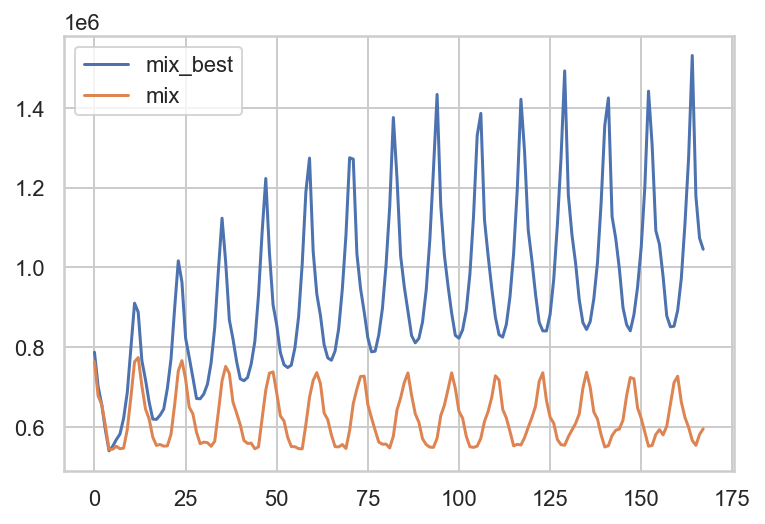

In [9]:
mix_best['IND'].plot()
# lstm['IND'].plot()
# xgboost['IND'].plot()
final['IND'].plot()
# plt.legend(['mix_best','lstm','xgboost','mix'])
plt.legend(['mix_best','mix'])